In [459]:
# Predicting the sales with different conditions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("store.csv")

In [6]:
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [7]:
df.shape

(1017209, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
#Converting the dtypes

In [10]:
df["Date"]=pd.to_datetime(df["Date"])

In [11]:
# Removing State Holiday and Open column Because as if store is close then sales become zero

In [12]:
df = df.drop(["Open","StateHoliday"],axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Promo          1017209 non-null  int64         
 6   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 54.3 MB


In [14]:
# Checking Null or Duplicated Values

In [15]:
Null = pd.DataFrame(df.isnull().sum())
Null.style.background_gradient(cmap = "turbo")

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Promo,0
SchoolHoliday,0


In [16]:
df.duplicated().sum()

0

In [17]:
# No Null and Duplicated values are present in Data

In [18]:
df["Date"].min()

Timestamp('2013-01-01 00:00:00')

In [19]:
df["Date"].max()

Timestamp('2015-07-31 00:00:00')

In [20]:
# converting Date into bins to check sales in each year

In [21]:
df["Group"] = df['Date'].dt.year

<AxesSubplot:xlabel='Group'>

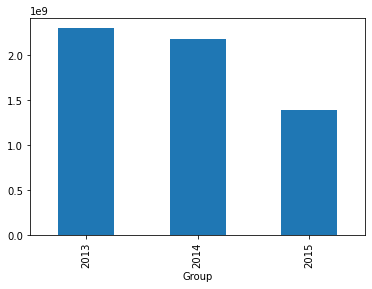

In [22]:
df.groupby("Group")["Sales"].sum().plot.bar()

In [23]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'SchoolHoliday', 'Group'],
      dtype='object')

In [24]:
# Removing date,Store & Group column

In [25]:
df = df.drop(["Date","Group","Store"],axis = 1)

In [26]:
# Checking Unique Values

In [27]:
Nunique = pd.DataFrame(df.nunique())
Nunique.style.background_gradient(cmap = "turbo")

,0
DayOfWeek,7
Sales,21734
Customers,4086
Promo,2
SchoolHoliday,2


In [28]:
# Checking correlation 

<AxesSubplot:>

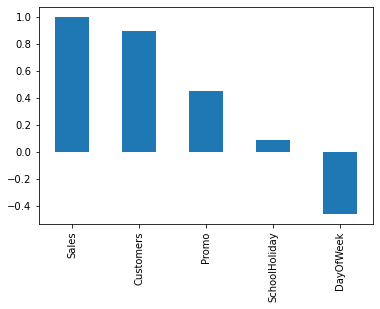

In [29]:
df.corr()["Sales"].sort_values(ascending = False).plot(kind = "bar")

In [30]:
# plotting dayofweek because it has -ve correlation with sales

<AxesSubplot:xlabel='DayOfWeek'>

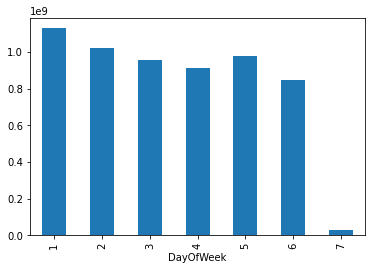

In [31]:
df.groupby("DayOfWeek")["Sales"].sum().plot.bar()

In [32]:
# Monday have more sales and Sunday have less sale, replacing sunday with space

In [33]:
df["Sunday_Cancel"] = np.where(df["DayOfWeek"]==7,0,df["DayOfWeek"])

In [34]:
df.head(1)

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Sunday_Cancel
0,5,5263,555,1,1,5


In [35]:
# Removing "DayofWeek"

In [36]:
df = df.drop(["DayOfWeek"],axis = 1)

In [37]:
# Checking the correlation

<AxesSubplot:>

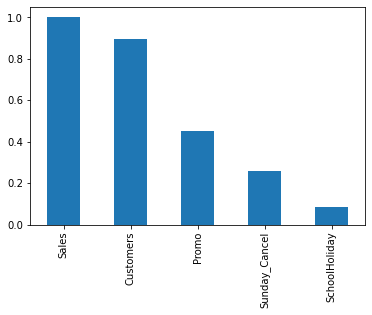

In [38]:
df.corr()["Sales"].sort_values(ascending = False).plot(kind = "bar")

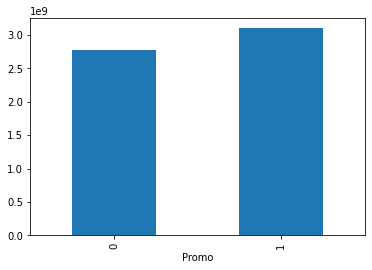

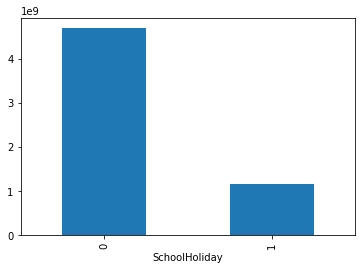

In [39]:
Columns = ["Promo","SchoolHoliday"]
for i in Columns:
    plt.figure(i)
    df.groupby(i)["Sales"].sum().plot.bar()

In [40]:
print(df.head(5))
print(df.shape)

   Sales  Customers  Promo  SchoolHoliday  Sunday_Cancel
0   5263        555      1              1              5
1   6064        625      1              1              5
2   8314        821      1              1              5
3  13995       1498      1              1              5
4   4822        559      1              1              5
(1017209, 5)


In [41]:
# data is large so creating subset of the data using 1000

In [42]:
df1 = df.sample(n = 1000)
print(df1.shape)

(1000, 5)


In [43]:
# Creating X & Y Labels

In [44]:
y = df1["Sales"]

In [45]:
x =df1.drop("Sales",axis = 1)

In [46]:
#train-test-split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
# using knn regressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor
model =KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train)
Subsety_pred=model.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, Subsety_pred)

0.8359014456180928

In [51]:
Range = [1,2,3,4,5,6,7,8,9,10]
K_value = []
for i in Range:
    model =KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    s = r2_score(y_test, y_pred)
    K_value.append(s)
    

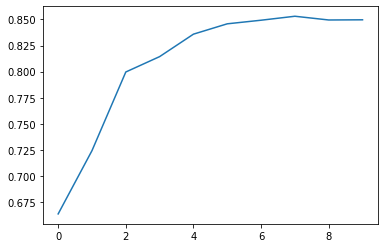

In [52]:
plt.plot(K_value)

In [53]:
# 3 is the best value for k

In [54]:
model =KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)
Subsety_pred=model.predict(x_test)

In [55]:
SubsetScore = r2_score(y_test, y_pred)
print(SubsetScore)

0.8496593096159284


In [56]:
# using knnRegg with k value 3 with all data

In [57]:
Y = df["Sales"]

In [58]:
X =df.drop("Sales",axis = 1)

In [59]:
print(X.shape)
print(Y.shape)

(1017209, 4)
(1017209,)


In [60]:
from sklearn.model_selection import train_test_split
Mx_train,Mx_test,My_train,My_test=train_test_split(X,Y,test_size=0.2)

In [61]:
from sklearn.neighbors import KNeighborsRegressor
model =KNeighborsRegressor(n_neighbors=3)
model.fit(Mx_train,My_train)
My_pred=model.predict(Mx_test)

In [62]:
MainScore = r2_score(y_test, y_pred)
print(MainScore)

0.8496593096159284


In [63]:
# Removing Outliers of sales (Using Subset Data)

<AxesSubplot:xlabel='Sales'>

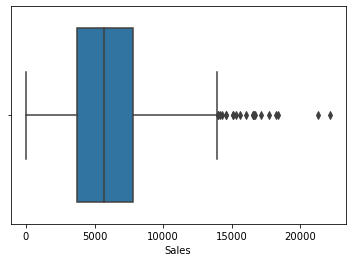

In [64]:
sns.boxplot(data = df1 , x = "Sales")

In [65]:
Q1 = df1["Sales"].quantile(0.25)

Q3 = df1["Sales"].quantile(0.75)

IQR = Q3 - Q1



Upper_Fence = Q3 + (1.5 * IQR)

In [66]:
Upper_Fence

13965.75

In [67]:
df2 = pd.DataFrame(df1)

In [71]:
df2["Sales"]=np.where(df1["Sales"]>13965.75,13965.75,df1["Sales"])

<AxesSubplot:xlabel='Sales'>

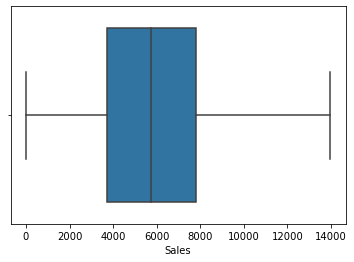

In [72]:
sns.boxplot(data = df2, x = "Sales")

In [73]:
# Removing Outliers of Customers (Using Subset Data)

<AxesSubplot:xlabel='Customers'>

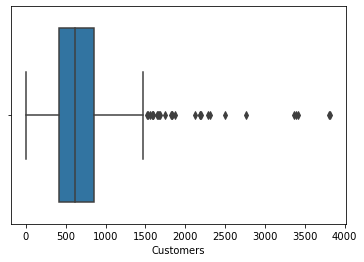

In [73]:
sns.boxplot(data = df1, x = "Customers")

In [74]:
Q11 = df1["Customers"].quantile(0.25)

Q33 = df1["Customers"].quantile(0.75)

IQR2 = Q33 - Q11



Upper_Fence2 = Q33 + (1.5 * IQR2)

In [75]:
Upper_Fence2

1513.125

In [76]:
df2["Customers"]= np.where(df1["Customers"]>1513.125,1513.125,df1["Customers"])

<AxesSubplot:xlabel='Customers'>

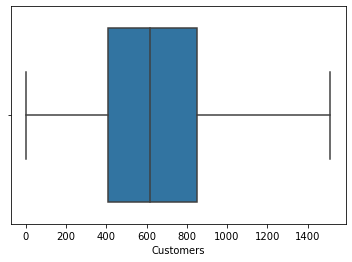

In [77]:
sns.boxplot(data = df2, x = "Customers")

In [78]:
df2.head(2)

,Sales,Customers,Promo,SchoolHoliday,Sunday_Cancel
721934,0.0,0.0,0,0,0
760156,4225.0,1065.0,0,1,1


In [79]:
yy = df2["Sales"]

In [80]:
xx =df2.drop("Sales",axis = 1)

In [81]:
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2)

In [82]:
model =KNeighborsRegressor(n_neighbors=7)
model.fit(xx_train,yy_train)
yy_pred=model.predict(xx_test)

In [83]:
yyScore = r2_score(yy_test, yy_pred)
print(yyScore)

0.8531692880630648


In [84]:
Range = [1,2,3,4,5,6,7,8,9,10]
K_value2 = []
for i in Range:
    model =KNeighborsRegressor(n_neighbors=i)
    model.fit(xx_train,yy_train)
    yy_pred=model.predict(xx_test)
    ss = r2_score(yy_test, yy_pred)
    K_value2.append(ss)
    

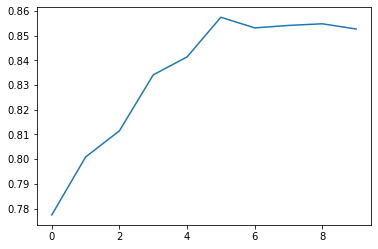

In [85]:
plt.plot(K_value2)

In [89]:
# when k = 5 we get highest Score > 85% but without removing outliers we get score is > 84%

In [86]:
# USING SIMPLE MEAN METHOD TO REMOVE OUTLIERS

In [87]:
df1["Sales"].mean()

5671.736

In [88]:
df1["Customers"].mean()

627.976

In [89]:
df3 = pd.DataFrame(df1)

In [90]:
df3["Customers"]= np.where(df3["Customers"]>627.976,627.976,df1["Customers"])

In [91]:
df3["Sales"]= np.where(df3["Sales"]>5671.736,5671.736,df1["Sales"])

In [92]:
df3.head(5)

,Sales,Customers,Promo,SchoolHoliday,Sunday_Cancel
721934,0.000,0.000,0,0,0
760156,4225.000,627.976,0,1,1
828392,5671.736,627.976,1,0,3
733289,5325.000,581.000,1,0,4
321536,5671.736,627.976,1,0,3


In [93]:
df3["Sales"].max()

5671.736

In [94]:
yyy = df3["Sales"]

In [95]:
xxx =df3.drop("Sales",axis = 1)

In [96]:
xxx_train,xxx_test,yyy_train,yyy_test=train_test_split(xxx,yyy,test_size=0.2)

In [97]:
model =KNeighborsRegressor(n_neighbors=7)
model.fit(xxx_train,yyy_train)
yyy_pred=model.predict(xxx_test)

In [98]:
yyyScore = r2_score(yyy_test, yyy_pred)
print(yyyScore)

0.9487439578930414


In [99]:
Range = [1,2,3,4,5,6,7,8,9,10]
K_value3 = []
for i in Range:
    model =KNeighborsRegressor(n_neighbors=i)
    model.fit(xxx_train,yyy_train)
    yyy_pred=model.predict(xxx_test)
    sss = r2_score(yyy_test, yyy_pred)
    K_value3.append(sss)

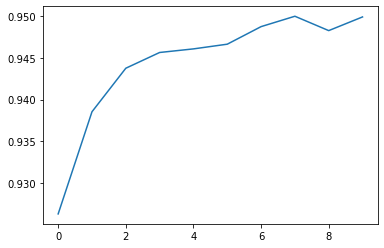

In [100]:
plt.plot(K_value3)

In [109]:
# k = 3 is the best value we get 94% accuracy Applying this on all the data

In [ ]:
# we improve this score by ussing different models and with differnt techniques.